# Part C. Multinomial (Softmax) Logistic Regression from Scratch

##  Teoría
## Derivación del gradiente de la función de log-verosimilitud en la regresión Softmax

El objetivo es derivar el gradiente de la **log-verosimilitud** para el modelo de **regresión logística multinomial (Softmax)**. Este modelo extiende la regresión logística binaria al caso multiclase, permitiendo modelar la probabilidad de pertenencia a cada una de $K$ clases mutuamente excluyentes.

---

### Paso 0. Planteamiento general del modelo

Para un conjunto de datos $\mathcal{D}=\{(x^{(i)}, y^{(i)})\}_{i=1}^n$, donde $x^{(i)} \in \mathbb{R}^d$ y $y^{(i)} \in \{1,2,\dots,K\}$, el modelo Softmax define la probabilidad de que un individuo $i$ pertenezca a la clase $k$ como:

$$
P_{\theta}(y=k \mid x^{(i)}) \;=\;
\frac{\exp\!\big(\theta_k^\top x^{(i)}\big)}
{\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)},
$$

donde $\theta_k \in \mathbb{R}^d$ es el vector de parámetros correspondiente a la clase $k$, y $\theta=[\theta_1,\theta_2,\dots,\theta_K]$ agrupa todos los parámetros del modelo.

El objetivo del entrenamiento es **maximizar la log-verosimilitud** de los datos bajo este modelo.

---

### Paso 1. Función de log-verosimilitud

La verosimilitud del conjunto de datos es:
$$
L(\theta) \;=\; \prod_{i=1}^{n} P_{\theta}\!\big(y^{(i)} \mid x^{(i)}\big).
$$

Tomando logaritmos:
$$
\ell(\theta) \;=\; \log L(\theta)
\;=\; \sum_{i=1}^{n} \log P_{\theta}\!\big(y^{(i)} \mid x^{(i)}\big).
$$

Sustituyendo la forma Softmax:
$$
\ell(\theta) \;=\;
\sum_{i=1}^{n} \log\!\left(
\frac{\exp\!\big(\theta_{y^{(i)}}^\top x^{(i)}\big)}
{\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)}
\right).
$$

Separando numerador y denominador:
$$
\ell(\theta) \;=\;
\underbrace{\sum_{i=1}^{n}\theta_{y^{(i)}}^\top x^{(i)}}_{\text{(A)}}
\;-\;
\underbrace{\sum_{i=1}^{n}\log\!\left(\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)\right)}_{\text{(B)}}.
$$

Esta forma es conveniente: (A) es lineal en los parámetros y (B) es un log-sum-exp, derivable con la regla de la cadena.

---

### Paso 2. Derivación del término (A)

El término (A) involucra únicamente los parámetros de la clase verdadera $y^{(i)}$ de cada observación. Al derivar respecto de $\theta_\ell$:

$$
\frac{\partial \text{(A)}}{\partial \theta_\ell}
\;=\;
\sum_{i=1}^{n} \mathbf{1}\{\,y^{(i)}=\ell\,\}\; x^{(i)}.
$$

Aquí, $\mathbf{1}\{\,y^{(i)}=\ell\,\}$ vale $1$ si $y^{(i)}=\ell$, y $0$ en caso contrario.

---

### Paso 3. Derivación del término (B) — Regla de la cadena

Defínase
$$
g_i(\theta) \;=\; \log\!\left(\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)\right).
$$

Aplicando la regla de la cadena:
$$
\frac{\partial g_i}{\partial \theta_\ell}
\;=\;
\frac{1}{\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)}
\cdot
\exp\!\big(\theta_\ell^\top x^{(i)}\big)\; x^{(i)}
\;=\;
P_{\theta}(y=\ell \mid x^{(i)})\; x^{(i)}.
$$

Sumando sobre $i$ y recordando que (B) **se resta** en $\ell(\theta)$:
$$
-\frac{\partial \text{(B)}}{\partial \theta_\ell}
\;=\;
-\sum_{i=1}^{n} P_{\theta}(y=\ell \mid x^{(i)})\; x^{(i)}.
$$

---

### Paso 4. Combinación de ambos resultados

El gradiente total respecto de $\theta_\ell$ resulta:
$$
\frac{\partial \ell(\theta)}{\partial \theta_\ell}
\;=\;
\sum_{i=1}^{n}
\Big(
\mathbf{1}\{\,y^{(i)}=\ell\,\} \;-\; P_{\theta}(y=\ell \mid x^{(i)})
\Big)\; x^{(i)}.
$$

O de forma equivalente (más “visual”):
$$
\frac{\partial \ell(\theta)}{\partial \theta_\ell}
\;=\;
\sum_{i=1}^{n}
x^{(i)}
\left[
\mathbf{1}\{\,y^{(i)}=\ell\,\}
-
\frac{\exp\!\big(\theta_\ell^\top x^{(i)}\big)}
{\sum_{j=1}^{K}\exp\!\big(\theta_j^\top x^{(i)}\big)}
\right].
$$

Este resultado refleja **observado − predicho** (en probabilidad) ponderado por las características $x^{(i)}$.

---

### Paso 5. Forma matricial

Para implementación vectorizada, sea:

- $X \in \mathbb{R}^{n \times d}$: matriz de datos (filas $x^{(i)\top}$),
- $Y \in \{0,1\}^{n \times K}$: codificación one-hot de las etiquetas,
- $P = \mathrm{softmax}(X\theta) \in \mathbb{R}^{n \times K}$: probabilidades predichas.

Entonces:
$$
\nabla_{\theta}\, \ell(\theta) \;=\; X^\top (Y - P).
$$

---

### Paso 6. Interpretación del resultado

- $Y - P$ es la diferencia entre lo **observado** y lo **predicho**.
- $X^\top (Y - P)$ acumula esa diferencia ponderada por cada variable explicativa.
- Si el modelo predice bien, $Y \approx P$ y el gradiente tiende a cero (convergencia).

En la práctica se **minimiza** la NLL (negativa de la log-verosimilitud), de modo que:
$$
\nabla_{\theta} L_{\text{NLL}} \;=\; X^\top (P - Y).
$$

---

### Resultado final

$$
\boxed{
\frac{\partial \ell(\theta)}{\partial \theta_\ell}
=
\sum_{i=1}^{n}
x^{(i)}\Big[
\mathbf{1}\{\,y^{(i)}=\ell\,\}
-
P_{\theta}(y=\ell \mid x^{(i)})
\Big],
\qquad
\nabla_{\theta}\, \ell(\theta) \;=\; X^\top (Y - P).
}
$$

## Implementación y Evaluación

Imports y configuración

In [1]:
# --- Celda 1: Imports y configuración inicial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

# Imports de tus módulos utilitarios
from utils.preprocessing import load_wine_data
from utils.logistic_core import fit_softmax_gd, predict_softmax, predict_proba_softmax
from utils.visualization import plot_convergence
from utils.metrics import evaluate_classification

sns.set(style="whitegrid")


Entorno de trabajo correctamente configurado.

Versión de Python: 3.10.0
Numpy: 2.2.6
Pandas: 2.3.3
Scikit-learn: 1.7.2
Matplotlib: 3.10.6
Seaborn: 0.13.2
OpenML: 0.15.1
Joblib: 1.5.2


Cargar y preparar los datos (Wine dataset)

In [2]:
# --- Celda 2: Carga y preprocesamiento del dataset Wine
X_train, X_test, y_train, y_test, feature_names, class_names = load_wine_data()

print(f"Clases: {class_names}")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Wine cargado y estandarizado
Train: (124, 13) | Test: (54, 13)
Clases: ['class_0', 'class_1', 'class_2']
Train shape: (124, 13), Test shape: (54, 13)


Entrenamiento del modelo Softmax

Iter    0 | NLL=1.099671
Iter  100 | NLL=0.086475
Iter  200 | NLL=0.054731
Iter  300 | NLL=0.041254
Iter  400 | NLL=0.033456
Iter  500 | NLL=0.028289
Iter  600 | NLL=0.024585
Iter  700 | NLL=0.021786
Iter  800 | NLL=0.019589
Iter  900 | NLL=0.017816
Iter 1000 | NLL=0.016351
Iter 1100 | NLL=0.015120
Iter 1200 | NLL=0.014069
Iter 1300 | NLL=0.013160
Iter 1400 | NLL=0.012366
Iter 1500 | NLL=0.011667
Iter 1600 | NLL=0.011045
Iter 1700 | NLL=0.010488
Iter 1800 | NLL=0.009987
Iter 1900 | NLL=0.009533
Iter 2000 | NLL=0.009120
Iter 2100 | NLL=0.008743
Iter 2200 | NLL=0.008397
Iter 2300 | NLL=0.008077
Iter 2400 | NLL=0.007782
Iter 2500 | NLL=0.007509
Iter 2600 | NLL=0.007254
Iter 2700 | NLL=0.007017
Iter 2800 | NLL=0.006795
Iter 2900 | NLL=0.006587
Entrenamiento completado. Iteraciones: 3000


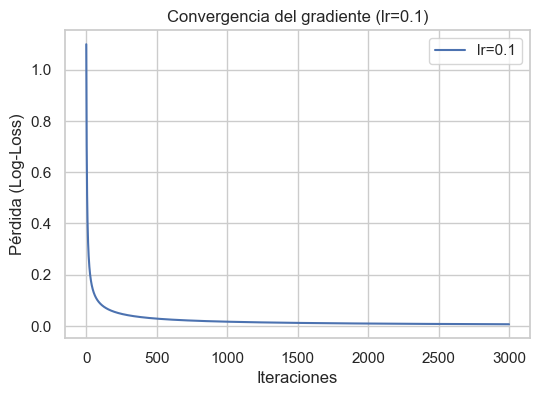

In [3]:
# --- Celda 3: Entrenamiento Softmax con descenso de gradiente
lr = 0.1
n_iter = 3000

W, history = fit_softmax_gd(X_train, y_train, lr=lr, n_iter=n_iter, verbose=True)

print(f"Entrenamiento completado. Iteraciones: {len(history)}")
plot_convergence(history, lr, save_path="../report/figuras/curva_convergencia_softmax.png")


Evaluación del modelo (implementación propia)

In [4]:
# --- Celda 4: Evaluación en test
y_pred = predict_softmax(X_test, W)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (Softmax scratch): {acc:.4f}")

Accuracy (Softmax scratch): 0.9815


In [5]:
# Métricas detalladas
print("\nReporte de clasificación (Softmax scratch):")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))


Reporte de clasificación (Softmax scratch):
              precision    recall  f1-score   support

     class_0     0.9474    1.0000    0.9730        18
     class_1     1.0000    0.9524    0.9756        21
     class_2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54



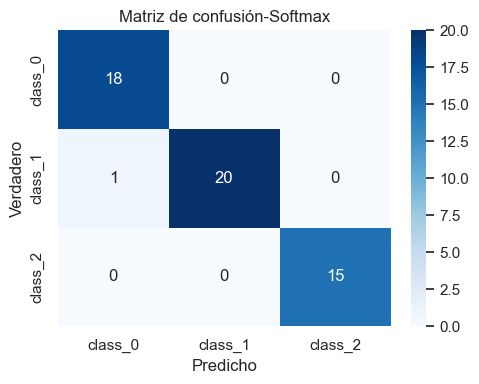

In [7]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de confusión-Softmax")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.tight_layout()
plt.savefig("../report/figuras/matriz_confusion_softmax.png", dpi=150)
plt.show()

In [8]:
# Métricas globales
print("Métricas resumidas:", evaluate_classification(y_test, y_pred))

Métricas resumidas: {'accuracy': 0.981, 'precision': 0.982, 'recall': 0.984, 'f1': 0.983}


Comparación con sklearn.LogisticRegression (multinomial)

In [9]:
# --- Celda 5: Comparación con sklearn
lr_skl = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000)
lr_skl.fit(X_train, y_train)
y_pred_skl = lr_skl.predict(X_test)

acc_skl = accuracy_score(y_test, y_pred_skl)
print(f"Accuracy (sklearn multinomial): {acc_skl:.4f}")

print("\nReporte de clasificación (sklearn multinomial):")
print(classification_report(y_test, y_pred_skl, target_names=class_names, digits=4))


Accuracy (sklearn multinomial): 0.9815

Reporte de clasificación (sklearn multinomial):
              precision    recall  f1-score   support

     class_0     0.9474    1.0000    0.9730        18
     class_1     1.0000    0.9524    0.9756        21
     class_2     1.0000    1.0000    1.0000        15

    accuracy                         0.9815        54
   macro avg     0.9825    0.9841    0.9829        54
weighted avg     0.9825    0.9815    0.9815        54



c:\Users\pc\Desktop\PEU DATA SCIENCE INEI\PEU INEI\ALEXANDER ML\PRACTICAS\TAREA 2\ENEI-2025-ML1-Tarea2\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


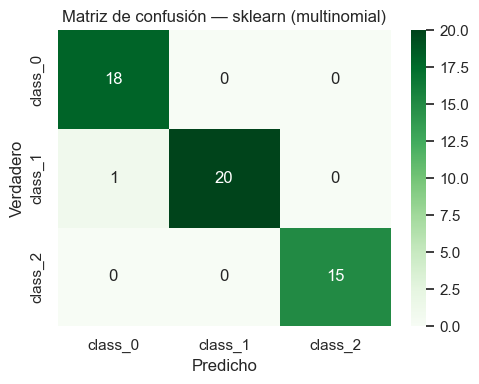

In [10]:
# Matriz de confusión sklearn
cm_skl = confusion_matrix(y_test, y_pred_skl)
plt.figure(figsize=(5,4))
sns.heatmap(cm_skl, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de confusión — sklearn (multinomial)")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.tight_layout()
plt.savefig("../report/figuras/matriz_confusion_softmax_sklearn.png", dpi=150)
plt.show()

Comparación visual de coeficientes

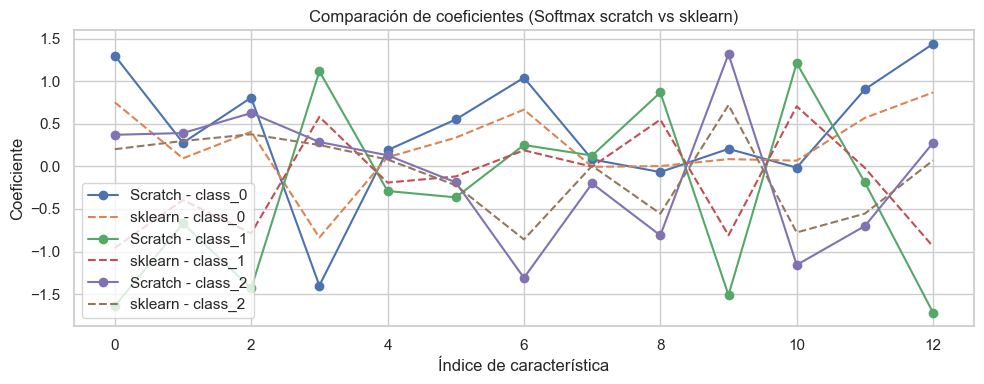

In [11]:
# --- Celda 6: Comparación de coeficientes entre scratch y sklearn
W_scratch = W[1:, :]     # sin bias
W_skl = lr_skl.coef_.T   # transpuesta para coincidir en forma

plt.figure(figsize=(10,4))
for k, cls in enumerate(class_names):
    plt.plot(W_scratch[:, k], label=f"Scratch - {cls}", marker="o")
    plt.plot(W_skl[:, k], '--', label=f"sklearn - {cls}")
plt.legend()
plt.title("Comparación de coeficientes (Softmax scratch vs sklearn)")
plt.xlabel("Índice de característica")
plt.ylabel("Coeficiente")
plt.tight_layout()
plt.savefig("../report/figuras/comparacion_coeficientes.png", dpi=150)
plt.show()
